# Analysing Spoofed files in Eval set - version 2.0 dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [2]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/eval_prediction.txt'
new_pred_file = 'model_3sec_relu_0.5_run8/predictions/eval_prediction_with_index.txt'

In [3]:
%%bash

cat model_3sec_relu_0.5_run8/predictions/eval_prediction_with_index.txt | tail

13296 0.99971 0.000289742 8.14623
13297 0.714206 0.285794 0.915902
13298 0.979049 0.0209506 3.84442
13299 0.997787 0.00221326 6.11107
13300 0.906844 0.0931564 2.27569
13301 0.000815822 0.999184 -7.1105
13302 0.271402 0.728598 -0.98752
13303 0.998507 0.00149273 6.50565
13304 0.065963 0.934037 -2.65042
13305 0.30818 0.69182 -0.808642


In [4]:
# Separate out predictions of genuine and spoofed files
# Eval set set has first 1298 as genuine and remaining 12008 are spoofed
# This is based on the protocal file I created which was used during training and feature extraction

all_predictions = []
all_gens = []
all_spoofs = []

with open(new_pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:1298]                 
all_spf_predictions = all_predictions[1298:]                 

In [5]:
print(len(all_gen_predictions))
print(len(all_spf_predictions))

1298
12008


In [7]:
# Collect all spoofed files for which spoof class got probability > 90%
# the strongly correctly classified cases

fname='index_file_list/allSpoofIndexList_TP.txt'
count=0
splitIndex = 2                   # 1 for genuine and 2 for spoofed (the third column)
predList = all_spf_predictions   # use all_spf_predictions for spoofed case

#print(len(predList))

with open(fname,'w') as f2:
    for items in predList:
        prob = items.strip().split(' ')[splitIndex]   
        if float(prob) > 0.9:
            #print(items)
            count+=1
            f2.write(items+'\n')            
print(count)


1679


In [8]:
%%bash
cat index_file_list/allSpoofIndexList_TP.txt | wc -l

1679


## Total examples we use = 1679 (with spoofed class prob>90%)

***Point***
> We select all those spoofed files that got spoofed probability > 90%. We have 733 spoofed files that we can use SLIME to get a reliable estimate for what the CNN might have learned about the spoofed class. Note that when running slime, for many files the SLIME returns no explanation coz we are only returning positive instance explanation. Thus we remove those files.

> Therefore, these spoofed files have been classified with > 90% probability of being spoofed

## Analysing Time: The top two components from SLIME - True positive Spoofed case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

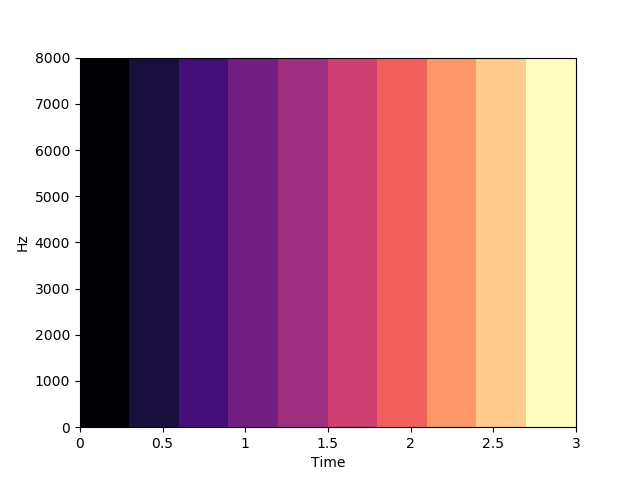

In [46]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [52]:
# Get temporal explanation from slime

file = 'top_two_explanation_indices/time/spoof_TP_box.txt'  # with signal box for spectrogram

In [53]:
%%bash
cat top_two_explanation_indices/time/spoof_TP_box.txt  | head

0 -999
0 -999
0 -999
0 8
0 -999
0 -999
0 -999
0 1
0 -999
0 -999


In [54]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f if int(line.strip().split(' ')[1]) != -999]
    return top1, top2    

In [55]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [56]:
print(top2)

[8, 1, 8, 8, 0, 8, 8, 8, 8, 1, 0, 6, 9, 9, 1, 9, 0, 8, 7, 9, 5, 8, 8, 7, 9, 8, 8, 9, 6, 7, 9, 6, 8, 8, 8, 6, 7, 8, 0, 1, 1, 8, 1, 9, 8, 7, 1, 9, 1, 8, 9, 7, 7, 8, 7, 1, 1, 8, 1, 8, 8, 7, 6, 9, 9, 0, 6, 9, 9, 7, 5, 8, 1, 7, 8, 8, 8, 0, 1, 1, 8, 7, 1, 9, 9, 1, 8, 8, 1, 8, 8, 1, 1, 1, 7, 1, 8, 8, 1, 1, 9, 1, 2, 1, 8, 1, 1, 1, 0, 8, 0, 1, 8, 0, 1, 1, 7, 6, 1, 1, 0, 1, 8, 1, 8, 8, 1, 1, 0, 1, 6, 1, 0, 7, 1, 1, 1, 0, 0, 1, 8, 1, 1, 1, 6, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 8, 1, 7, 1, 1, 1, 1, 8, 1, 8, 8, 1, 1, 1, 1, 1, 7, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 8, 9, 8, 7, 8, 9, 8, 1, 6, 1, 1, 7, 7, 9, 1, 9, 1, 9, 6, 9, 8, 1, 1, 1, 9, 8, 9, 7, 1, 1, 1, 9, 1, 8, 7, 1, 1, 1, 1, 0, 6, 1, 9, 8, 1, 1, 1, 1, 1, 8, 8, 7, 1, 1, 1, 1, 8, 1, 1, 8, 8, 8, 6, 1, 7, 1, 1, 1, 8, 1, 1, 7, 6, 1, 6, 7, 1, 1, 1, 6, 1, 1, 7, 1, 1, 1, 8, 1, 1, 1, 1, 1, 2, 1, 1, 9, 7, 1, 8, 1]


In [57]:
print(len(top1))
print(len(top2))

726
285


In [58]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [59]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

In [60]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [61]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 703
Component 1 : 13
Component 2 : 0
Component 3 : 0
Component 4 : 0
Component 5 : 0
Component 6 : 0
Component 7 : 4
Component 8 : 6
Component 9 : 0


### Using the top1 components - given by SLIME (Time segmentation)

> With correct indexing **we got 733/950 spoofed files with 90% probability**. SLIME returned 726 top1 positive explanation. Out of these 726 files we find component 0 to be higly dominating. This strongly confirms our findings:

    Component 0 : 703
    Component 1 : 13
    Component 2 : 0
    Component 3 : 0
    Component 4 : 0
    Component 5 : 0
    Component 6 : 0
    Component 7 : 4
    Component 8 : 6
    Component 9 : 0

> *** Earlier when we were doing mistake (indexing issues) Using Signal box and creating new spectrograms***

    Component 0 : 401
    Component 1 : 10
    Component 2 : 0
    Component 3 : 0
    Component 4 : 0
    Component 5 : 0
    Component 6 : 0
    Component 7 : 1
    Component 8 : 5
    Component 9 : 0

    

*** Observation ***
> Top1 predictions favours the **first 300ms**. We get 703 votes (out of 733) from slime saying that it is looking at first 300 ms for spoofed class.

# Pick 5 audio files for hearing

In [62]:
#random_5_ids = [406,358,924,790,877]   # Spoof True positive, >90% probability
#add 1 to each to access correct file index in real world

#random_5_ids = [407,359,925,791,878]   # Spoof True positive, >90% probability
#base='/homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/'

In [63]:
%%bash
#cp /homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/D_1000878.wav audio_files_hearing/spoof_TP/

#ls audio_files_hearing/spoof_TP/

## Analysing Freq: The top two components from SLIME - True positive Spoofed

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

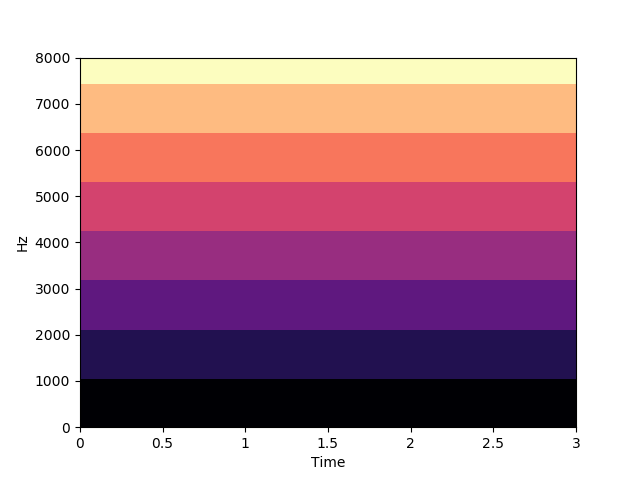

In [64]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [65]:
# Get explanation from SLIME

file = 'top_two_explanation_indices/freq/spoof_TP_box.txt'   # signal box -new specs

In [67]:
%%bash
cat 'top_two_explanation_indices/freq/spoof_TP_box.txt' | head


0 3
3 0
0 3
3 0
0 3
0 3
3 0
3 0
3 0
3 0


In [68]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [69]:
print(len(top1))
print(len(top2))

733
725


## Top 1 component distribution - Frequency

In [71]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [72]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 85
Component 1 : 3
Component 2 : 0
Component 3 : 528
Component 4 : 0
Component 5 : 86
Component 6 : 31
Component 7 : 0


> With corrected indexing and using proper spoofed files to generate explanation: out of 733 top 90% probability files, 528 files vote for Component 3 that belong to frequency 3000-4000 Hz. 

    Component 0 : 85
    Component 1 : 3
    Component 2 : 0
    Component 3 : 528
    Component 4 : 0
    Component 5 : 86
    Component 6 : 31
    Component 7 : 0


> (with indexing mistake) Using new spectrograms, ***with signal box***

    Component 0 : 158
    Component 1 : 5
    Component 2 : 9
    Component 3 : 415
    Component 4 : 0
    Component 5 : 29
    Component 6 : 15
    Component 7 : 0



In [76]:
# Plot the distribution
#plt.plot(top1,'.')

***Observation***
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 3000-4000Hz for component 3. This is different from what we saw for the genuine class (that favours highly for component 8, 7000-8000Hz)

***Out of total 733 spoofed files***
 1. 528 belongs to 4000Hz
 

**Observation: **
> In SLIME code, as I was returning two indices, for spoofed files SLIME was only returning positive index, which in many cases was only one, therefore, I put -999 as the second value (just not to break the code and make changes)

 * It give high importance to component 0, 3



# Pick 5 audio files for hearing

In [74]:
#random_5_ids = [891,153,271,390,647]   # Spoof True positive, >90% probability
#add 1 to each to access correct file index in real world

#random_5_ids = [892,154,272,391,648]   # Spoof True positive, >90% probability
#base='/homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/'

In [75]:
%%bash
#cp /homes/bc305/myphd/datasets/ASVSpoof2017_v2.0/ASVspoof2017_V2_dev/D_1000648.wav audio_files_hearing/spoof_TP/

#ls audio_files_hearing/spoof_TP/

# Overall Summary from this study (considering only top1 explanation)

**Time segmentation**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 655 True-positive spoofed files (with probability > 90%), the highest influence is shown for **component 0** that corresponds to **first 300ms**. We get 234 votes from slime.


**Frequency segmentation**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, we see that the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 4000Hz and 1000Hz.


> ***NOTE: In genuine case we got highest vote for 8000Hz bin***


** Correlation between time,frequency **

> Under time analysis we found that the model is highly influenced for first 300ms signal. This relates to the fact that the model seem to exploit information related to DTMF tone that was used for concatenating the original RedDots genuine signal to create spoofed counterparts. SLIME seems to explain this very fact, as we find 234 votes for the spoofed signals with probability greater than 90%. We may still want to double check this fact by just taking the spoofed files with highest probability !

> Next interesting observation we find is by doing frequency analysis, we see that spoofed class is looking at the high frequency

> To write properly !!

 